In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
appearances = pd.read_csv('Appearances.csv')
hof = pd.read_csv('HallOfFame.csv',usecols=['playerID','yearid','votedBy','needed_note','inducted','category'])
allstar = pd.read_csv('AllstarFull.csv', usecols=['playerID','yearID'])
awards = pd.read_csv('AwardsPlayers.csv', usecols=['playerID','awardID','yearID'])
batting = pd.read_csv('Batting.csv')
master = pd.read_csv('People.csv',usecols=['playerID','nameFirst','nameLast','bats','throws','debut','finalGame'])
fielding = pd.read_csv('Fielding.csv',usecols=['playerID','yearID','stint','teamID','lgID','POS','G','GS','InnOuts','PO','A','E','DP'])

In [355]:
batting.isnull().sum()

playerID        0
yearID          0
stint           0
teamID          0
lgID          738
G               0
AB              0
R               0
H               0
2B              0
3B              0
HR              0
RBI           756
SB           2368
CS          23492
BB              0
SO           6350
IBB         36602
HBP          2817
SH           6069
SF          36065
GIDP        25403
dtype: int64

In [0]:
player_stats = {}
years_played = {}        

In [0]:
for i, row in batting.iterrows():
    playerID = row['playerID']
    if playerID in player_stats:
        player_stats[playerID]['G'] = player_stats[playerID]['G'] + row['G']
        player_stats[playerID]['AB'] = player_stats[playerID]['AB'] + row['AB']
        player_stats[playerID]['R'] = player_stats[playerID]['R'] + row['R']
        player_stats[playerID]['H'] = player_stats[playerID]['H'] + row['H']
        player_stats[playerID]['2B'] = player_stats[playerID]['2B'] + row['2B']
        player_stats[playerID]['3B'] = player_stats[playerID]['3B'] + row['3B']
        player_stats[playerID]['HR'] = player_stats[playerID]['HR'] + row['HR']
        player_stats[playerID]['RBI'] = player_stats[playerID]['RBI'] + row['RBI']
        player_stats[playerID]['SB'] = player_stats[playerID]['SB'] + row['SB']
        player_stats[playerID]['BB'] = player_stats[playerID]['BB'] + row['BB']
        player_stats[playerID]['SO'] = player_stats[playerID]['SO'] + row['SO']
        player_stats[playerID]['IBB'] = player_stats[playerID]['IBB'] + row['IBB']
        player_stats[playerID]['HBP'] = player_stats[playerID]['HBP'] + row['HBP']
        player_stats[playerID]['SH'] = player_stats[playerID]['SH'] + row['SH']
        player_stats[playerID]['SF'] = player_stats[playerID]['SF'] + row['SF']
        years_played[playerID].append(row['yearID'])
    else:
        player_stats[playerID] = {}
        player_stats[playerID]['G'] = row['G']
        player_stats[playerID]['AB'] = row['AB']
        player_stats[playerID]['R'] = row['R']
        player_stats[playerID]['H'] = row['H']
        player_stats[playerID]['2B'] = row['2B']
        player_stats[playerID]['3B'] = row['3B']
        player_stats[playerID]['HR'] = row['HR']
        player_stats[playerID]['RBI'] = row['RBI']
        player_stats[playerID]['SB'] = row['SB']
        player_stats[playerID]['BB'] = row['BB']
        player_stats[playerID]['SO'] = row['SO']
        player_stats[playerID]['IBB'] = row['IBB']
        player_stats[playerID]['HBP'] = row['HBP']
        player_stats[playerID]['SH'] = row['SH']
        player_stats[playerID]['SF'] = row['SF']
        years_played[playerID] = []
        years_played[playerID].append(row['yearID'])

In [0]:
for k, v in years_played.items():
    player_stats[k]['Years_Played'] = len(list(set(v)))

In [0]:
fielder_list = []

for i, row in fielding.iterrows():
    playerID = row['playerID']
    Gf = row['G']
    GSf = row['GS']
    POf = row['PO']
    Af = row['A']
    Ef = row['E']
    DPf = row['DP']
    if playerID in player_stats and playerID in fielder_list:
        player_stats[playerID]['Gf'] = player_stats[playerID]['Gf'] + Gf
        player_stats[playerID]['GSf'] = player_stats[playerID]['GSf'] + GSf
        player_stats[playerID]['POf'] = player_stats[playerID]['POf'] + POf
        player_stats[playerID]['Af'] = player_stats[playerID]['Af'] + Af
        player_stats[playerID]['Ef'] = player_stats[playerID]['Ef'] + Ef
        player_stats[playerID]['DPf'] = player_stats[playerID]['DPf'] + DPf
    else:
        fielder_list.append(playerID)
        player_stats[playerID]['Gf'] = Gf
        player_stats[playerID]['GSf'] = GSf
        player_stats[playerID]['POf'] = POf
        player_stats[playerID]['Af'] = Af
        player_stats[playerID]['Ef'] = Ef
        player_stats[playerID]['DPf'] = DPf

In [360]:
awards['awardID'].unique()

array(['Pitching Triple Crown', 'Triple Crown',
       'Baseball Magazine All-Star', 'Most Valuable Player',
       'TSN All-Star', 'TSN Guide MVP',
       'TSN Major League Player of the Year', 'TSN Pitcher of the Year',
       'TSN Player of the Year', 'Rookie of the Year', 'Babe Ruth Award',
       'Lou Gehrig Memorial Award', 'World Series MVP', 'Cy Young Award',
       'Gold Glove', 'TSN Fireman of the Year', 'All-Star Game MVP',
       'Hutch Award', 'Roberto Clemente Award',
       'Rolaids Relief Man Award', 'NLCS MVP', 'ALCS MVP',
       'Silver Slugger', 'Branch Rickey Award', 'Hank Aaron Award',
       'TSN Reliever of the Year', 'Comeback Player of the Year',
       'Outstanding DH Award', 'Reliever of the Year Award'], dtype=object)

In [0]:
mvp = awards[awards['awardID'] == 'Most Valuable Player']
roy = awards[awards['awardID'] == 'Rookie of the Year']
gg = awards[awards['awardID'] == 'Gold Glove']
ss = awards[awards['awardID'] == 'Silver Slugger']
ws_mvp = awards[awards['awardID'] == 'World Series MVP']

In [0]:
awards_list = [mvp,roy,gg,ss,ws_mvp]

In [0]:
mvp_list = []
roy_list = []
gg_list = []
ss_list = []
ws_mvp_list = []

lists = [mvp_list,roy_list,gg_list,ss_list,ws_mvp_list]

for index, v in enumerate(awards_list):
    for i, row in v.iterrows():
        playerID = row['playerID']
        award = row['awardID']
        if playerID in player_stats and playerID in lists[index]:
            player_stats[playerID][award] += 1
        else:
            lists[index].append(playerID)
            player_stats[playerID][award] = 1

In [364]:
allstar.head()

,playerID,yearID
0,gomezle01,1933
1,ferreri01,1933
2,gehrilo01,1933
3,gehrich01,1933
4,dykesji01,1933


In [0]:
allstar_list = []

for i, row in allstar.iterrows():
    playerID = row['playerID']
    if playerID in player_stats and playerID in allstar_list:
        player_stats[playerID]['AS_games'] += 1
    else:
        allstar_list.append(playerID)
        player_stats[playerID]['AS_games'] = 1

In [366]:
hof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4191 entries, 0 to 4190
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   playerID     4191 non-null   object
 1   yearid       4191 non-null   int64 
 2   votedBy      4191 non-null   object
 3   inducted     4191 non-null   object
 4   category     4191 non-null   object
 5   needed_note  157 non-null    object
dtypes: int64(1), object(5)
memory usage: 196.6+ KB


In [367]:
hof_df = hof[(hof['inducted'] == 'Y') & (hof['category'] == 'Player')]
hof_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 4190
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   playerID     256 non-null    object
 1   yearid       256 non-null    int64 
 2   votedBy      256 non-null    object
 3   inducted     256 non-null    object
 4   category     256 non-null    object
 5   needed_note  3 non-null      object
dtypes: int64(1), object(5)
memory usage: 14.0+ KB


In [0]:
for i, row in hof_df.iterrows():
    playerID = row['playerID']
    if playerID in player_stats:
        player_stats[playerID]['HoF'] = 1
        player_stats[playerID]['votedBy'] = row['votedBy']

In [369]:
df = pd.DataFrame.from_dict(player_stats, orient='index')
df.head()

,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,IBB,HBP,SH,SF,Years_Played,Gf,GSf,POf,Af,Ef,DPf,HoF,votedBy,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger
abercda01,1,4,0,0,0,0,0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,1,1.0,1.0,1.0,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
addybo01,274,1231,227,341,36,13,1,167.0,NaN,20,9.0,NaN,NaN,NaN,NaN,6,276.0,NaN,478.0,306.0,207.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
allisar01,168,741,106,188,19,8,1,70.0,NaN,5,20.0,NaN,NaN,NaN,NaN,5,174.0,NaN,595.0,47.0,95.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
allisdo01,318,1407,236,382,44,10,2,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,10,345.0,NaN,1328.0,269.0,237.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ansonca01,2524,10281,1999,3435,582,142,97,2075.0,NaN,984,330.0,NaN,NaN,NaN,NaN,27,2593.0,NaN,22572.0,1612.0,976.0,1283.0,1.0,Old Timers,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df['playerID'] = df.index

In [371]:
master_df = master.join(df,on='playerID',how='inner', rsuffix='mstr')
master_df.head()

,playerID,nameFirst,nameLast,bats,throws,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,IBB,HBP,SH,SF,Years_Played,Gf,GSf,POf,Af,Ef,DPf,HoF,votedBy,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,playerIDmstr
0,aardsda01,David,Aardsma,R,R,2004-04-06,2015-08-23,331,4,0,0,0,0,0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,9,331.0,0.0,11.0,29.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aardsda01
1,aaronha01,Hank,Aaron,R,R,1954-04-13,1976-10-03,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,NaN,32.0,21.0,121.0,23,3020.0,2982.0,7436.0,429.0,144.0,218.0,1.0,BBWAA,1.0,25.0,3.0,NaN,NaN,NaN,aaronha01
2,aaronto01,Tommie,Aaron,R,R,1962-04-10,1971-09-26,437,944,102,216,42,6,13,94.0,9.0,86,145.0,3.0,0.0,9.0,6.0,7,387.0,206.0,1317.0,113.0,22.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aaronto01
3,aasedo01,Don,Aase,R,R,1977-07-26,1990-10-03,448,5,0,0,0,0,0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,13,448.0,91.0,67.0,135.0,13.0,10.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,aasedo01
4,abadan01,Andy,Abad,L,L,2001-09-10,2006-04-13,15,21,1,2,0,0,0,0.0,0.0,4,5.0,0.0,0.0,0.0,0.0,3,9.0,4.0,37.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,abadan01


In [0]:
pos_dict = {}

for i, row in appearances.iterrows():
    ID = row['playerID']
    year = row['yearID']
    if ID in pos_dict:
        pos_dict[ID]['G_all'] = pos_dict[ID]['G_all'] + row['G_all']
        pos_dict[ID]['G_p'] = pos_dict[ID]['G_p'] + row['G_p']
        pos_dict[ID]['G_c'] = pos_dict[ID]['G_c'] + row['G_c']
        pos_dict[ID]['G_1b'] = pos_dict[ID]['G_1b'] + row['G_1b']
        pos_dict[ID]['G_2b'] = pos_dict[ID]['G_2b'] + row['G_2b']
        pos_dict[ID]['G_3b'] = pos_dict[ID]['G_3b'] + row['G_3b']
        pos_dict[ID]['G_ss'] = pos_dict[ID]['G_ss'] + row['G_ss']
        pos_dict[ID]['G_lf'] = pos_dict[ID]['G_lf'] + row['G_lf']
        pos_dict[ID]['G_cf'] = pos_dict[ID]['G_cf'] + row['G_cf']
        pos_dict[ID]['G_rf'] = pos_dict[ID]['G_rf'] + row['G_rf']
        pos_dict[ID]['G_of'] = pos_dict[ID]['G_of'] + row['G_of']
        pos_dict[ID]['G_dh'] = pos_dict[ID]['G_dh'] + row['G_dh']
        if year < 1920:
            pos_dict[ID]['pre1920'] = pos_dict[ID]['pre1920'] + row['G_all']
        elif year >= 1920 and year <= 1941:
            pos_dict[ID]['1920-41'] = pos_dict[ID]['1920-41'] + row['G_all']
        elif year >= 1942 and year <= 1945:
            pos_dict[ID]['1942-45'] = pos_dict[ID]['1942-45'] + row['G_all']
        elif year >= 1946 and year <= 1962:
            pos_dict[ID]['1946-62'] = pos_dict[ID]['1946-62'] + row['G_all']
        elif year >= 1963 and year <= 1976:
            pos_dict[ID]['1963-76'] = pos_dict[ID]['1963-76'] + row['G_all']
        elif year >= 1977 and year <= 1992:
            pos_dict[ID]['1977-92'] = pos_dict[ID]['1977-92'] + row['G_all']
        elif year >= 1993 and year <= 2009:
            pos_dict[ID]['1993-2009'] = pos_dict[ID]['1993-2009'] + row['G_all']
        elif year > 2009:
            pos_dict[ID]['post2009'] = pos_dict[ID]['post2009'] + row['G_all']
    else:
        pos_dict[ID] = {}
        pos_dict[ID]['G_all'] = row['G_all']
        pos_dict[ID]['G_p'] = row['G_p']
        pos_dict[ID]['G_c'] = row['G_c']
        pos_dict[ID]['G_1b'] = row['G_1b']
        pos_dict[ID]['G_2b'] = row['G_2b']
        pos_dict[ID]['G_3b'] = row['G_3b']
        pos_dict[ID]['G_ss'] = row['G_ss']
        pos_dict[ID]['G_lf'] = row['G_lf']
        pos_dict[ID]['G_cf'] = row['G_cf']
        pos_dict[ID]['G_rf'] = row['G_rf']
        pos_dict[ID]['G_of'] = row['G_of']
        pos_dict[ID]['G_dh'] = row['G_dh']
        pos_dict[ID]['pre1920'] = 0
        pos_dict[ID]['1920-41'] = 0
        pos_dict[ID]['1942-45'] = 0
        pos_dict[ID]['1946-62'] = 0
        pos_dict[ID]['1963-76'] = 0
        pos_dict[ID]['1977-92'] = 0
        pos_dict[ID]['1993-2009'] = 0
        pos_dict[ID]['post2009'] = 0
        if year < 1920:
            pos_dict[ID]['pre1920'] = row['G_all']
        elif year >= 1920 and year <= 1941:
            pos_dict[ID]['1920-41'] = row['G_all']
        elif year >= 1942 and year <= 1945:
            pos_dict[ID]['1942-45'] = row['G_all']
        elif year >= 1946 and year <= 1962:
            pos_dict[ID]['1946-62'] = row['G_all']
        elif year >= 1963 and year <= 1976:
            pos_dict[ID]['1963-76'] = row['G_all']
        elif year >= 1977 and year <= 1992:
            pos_dict[ID]['1977-92'] = row['G_all']
        elif year >= 1993 and year <= 2009:
            pos_dict[ID]['1993-2009'] = row['G_all']
        elif year > 2009:
            pos_dict[ID]['post2009'] = row['G_all']

In [373]:
pos_df = pd.DataFrame.from_dict(pos_dict, orient='index')
pos_df.head()

,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009
abercda01,1,0,0,0,0,0,1,0,0,0,0,0.0,1,0,0,0,0,0,0,0
addybo01,274,0,0,0,79,5,4,3,2,183,188,0.0,274,0,0,0,0,0,0,0
allisar01,168,0,3,35,4,0,0,8,56,68,132,0.0,168,0,0,0,0,0,0,0
allisdo01,316,1,277,2,1,0,1,0,7,54,61,0.0,316,0,0,0,0,0,0,0
ansonca01,2524,3,105,2152,18,220,9,46,8,32,86,0.0,2524,0,0,0,0,0,0,0


In [0]:
pos_col_list = pos_df.columns.tolist()
pos_col_list.remove('G_all')

for col in pos_col_list:
    column = col + '_percent'
    pos_df[column] = pos_df[col] / pos_df['G_all']

In [375]:
pos_df.head()

,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent
abercda01,1,0,0,0,0,0,1,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
addybo01,274,0,0,0,79,5,4,3,2,183,188,0.0,274,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.288321,0.018248,0.014599,0.010949,0.007299,0.667883,0.686131,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
allisar01,168,0,3,35,4,0,0,8,56,68,132,0.0,168,0,0,0,0,0,0,0,0.000000,0.017857,0.208333,0.023810,0.000000,0.000000,0.047619,0.333333,0.404762,0.785714,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
allisdo01,316,1,277,2,1,0,1,0,7,54,61,0.0,316,0,0,0,0,0,0,0,0.003165,0.876582,0.006329,0.003165,0.000000,0.003165,0.000000,0.022152,0.170886,0.193038,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ansonca01,2524,3,105,2152,18,220,9,46,8,32,86,0.0,2524,0,0,0,0,0,0,0,0.001189,0.041601,0.852615,0.007132,0.087163,0.003566,0.018225,0.003170,0.012678,0.034073,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [376]:
pos_df = pos_df[(pos_df['G_p_percent'] < 0.1)& (pos_df['G_c_percent'] < 0.1)]
pos_df.head()

,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent
abercda01,1,0,0,0,0,0,1,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
addybo01,274,0,0,0,79,5,4,3,2,183,188,0.0,274,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.288321,0.018248,0.014599,0.010949,0.007299,0.667883,0.686131,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
allisar01,168,0,3,35,4,0,0,8,56,68,132,0.0,168,0,0,0,0,0,0,0,0.000000,0.017857,0.208333,0.023810,0.000000,0.000000,0.047619,0.333333,0.404762,0.785714,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ansonca01,2524,3,105,2152,18,220,9,46,8,32,86,0.0,2524,0,0,0,0,0,0,0,0.001189,0.041601,0.852615,0.007132,0.087163,0.003566,0.018225,0.003170,0.012678,0.034073,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
armstbo01,12,0,0,0,0,0,0,0,11,1,12,0.0,12,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.916667,0.083333,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [377]:
master_df = master_df.join(pos_df,on='playerID',how='right')
master_df.head()

,playerID,nameFirst,nameLast,bats,throws,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,IBB,HBP,SH,SF,Years_Played,Gf,GSf,POf,Af,Ef,DPf,HoF,votedBy,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,playerIDmstr,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent
1,aaronha01,Hank,Aaron,R,R,1954-04-13,1976-10-03,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,NaN,32.0,21.0,121.0,23,3020.0,2982.0,7436.0,429.0,144.0,218.0,1.0,BBWAA,1.0,25.0,3.0,NaN,NaN,NaN,aaronha01,3298,0,0,210,43,7,0,315,308,2174,2760,201.0,0,0,0,1350,1948,0,0,0,0.0,0.0,0.063675,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0
2,aaronto01,Tommie,Aaron,R,R,1962-04-10,1971-09-26,437,944,102,216,42,6,13,94.0,9.0,86,145.0,3.0,0.0,9.0,6.0,7,387.0,206.0,1317.0,113.0,22.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aaronto01,437,0,0,232,7,10,0,135,1,2,137,0.0,0,0,0,141,296,0,0,0,0.0,0.0,0.530892,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,0.0,0.0,0.0,0.322654,0.677346,0.0,0.0,0.0
4,abadan01,Andy,Abad,L,L,2001-09-10,2006-04-13,15,21,1,2,0,0,0,0.0,0.0,4,5.0,0.0,0.0,0.0,0.0,3,9.0,4.0,37.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,abadan01,15,0,0,8,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,15,0,0.0,0.0,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0
6,abadijo01,John,Abadie,R,R,1875-04-26,1875-06-10,12,49,4,11,0,0,0,5.0,1.0,0,3.0,NaN,NaN,NaN,NaN,1,12.0,NaN,129.0,3.0,13.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,abadijo01,12,0,0,12,0,0,0,0,0,0,0,0.0,12,0,0,0,0,0,0,0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
7,abbated01,Ed,Abbaticchio,R,R,1897-09-04,1910-09-15,855,3044,355,772,99,43,11,324.0,142.0,289,NaN,NaN,33.0,93.0,NaN,9,830.0,NaN,1873.0,2368.0,315.0,247.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,abbated01,855,0,0,0,419,20,388,0,2,1,3,NaN,855,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.490058,0.023392,0.453801,0.000000,0.002339,0.001170,0.003509,NaN,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [378]:
master_df['votedBy'] = master_df['votedBy'].fillna('NoNe')
master_df.head()

,playerID,nameFirst,nameLast,bats,throws,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,IBB,HBP,SH,SF,Years_Played,Gf,GSf,POf,Af,Ef,DPf,HoF,votedBy,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,playerIDmstr,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent
1,aaronha01,Hank,Aaron,R,R,1954-04-13,1976-10-03,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,NaN,32.0,21.0,121.0,23,3020.0,2982.0,7436.0,429.0,144.0,218.0,1.0,BBWAA,1.0,25.0,3.0,NaN,NaN,NaN,aaronha01,3298,0,0,210,43,7,0,315,308,2174,2760,201.0,0,0,0,1350,1948,0,0,0,0.0,0.0,0.063675,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0
2,aaronto01,Tommie,Aaron,R,R,1962-04-10,1971-09-26,437,944,102,216,42,6,13,94.0,9.0,86,145.0,3.0,0.0,9.0,6.0,7,387.0,206.0,1317.0,113.0,22.0,124.0,NaN,NoNe,NaN,NaN,NaN,NaN,NaN,NaN,aaronto01,437,0,0,232,7,10,0,135,1,2,137,0.0,0,0,0,141,296,0,0,0,0.0,0.0,0.530892,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,0.0,0.0,0.0,0.322654,0.677346,0.0,0.0,0.0
4,abadan01,Andy,Abad,L,L,2001-09-10,2006-04-13,15,21,1,2,0,0,0,0.0,0.0,4,5.0,0.0,0.0,0.0,0.0,3,9.0,4.0,37.0,1.0,1.0,3.0,NaN,NoNe,NaN,NaN,NaN,NaN,NaN,NaN,abadan01,15,0,0,8,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,15,0,0.0,0.0,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0
6,abadijo01,John,Abadie,R,R,1875-04-26,1875-06-10,12,49,4,11,0,0,0,5.0,1.0,0,3.0,NaN,NaN,NaN,NaN,1,12.0,NaN,129.0,3.0,13.0,1.0,NaN,NoNe,NaN,NaN,NaN,NaN,NaN,NaN,abadijo01,12,0,0,12,0,0,0,0,0,0,0,0.0,12,0,0,0,0,0,0,0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
7,abbated01,Ed,Abbaticchio,R,R,1897-09-04,1910-09-15,855,3044,355,772,99,43,11,324.0,142.0,289,NaN,NaN,33.0,93.0,NaN,9,830.0,NaN,1873.0,2368.0,315.0,247.0,NaN,NoNe,NaN,NaN,NaN,NaN,NaN,NaN,abbated01,855,0,0,0,419,20,388,0,2,1,3,NaN,855,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.490058,0.023392,0.453801,0.000000,0.002339,0.001170,0.003509,NaN,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [379]:
master_df['votedBy'].unique()

array(['BBWAA', 'NoNe', 'Old Timers', 'Run Off', 'Veterans',
       'Negro League', 'Special Election'], dtype=object)

In [380]:
master_df = master_df[(master_df['votedBy'] == 'BBWAA') | (master_df['votedBy'] == 'NoNe') | (master_df['votedBy'] == 'Run Off')]
master_df['votedBy'].unique()

array(['BBWAA', 'NoNe', 'Run Off'], dtype=object)

In [381]:
master_df['bats_r'] = master_df['bats'].map({'R': 1,'L': 0})
master_df.head()

,playerID,nameFirst,nameLast,bats,throws,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,IBB,HBP,SH,SF,Years_Played,Gf,GSf,POf,Af,Ef,DPf,HoF,votedBy,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,playerIDmstr,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,bats_r
1,aaronha01,Hank,Aaron,R,R,1954-04-13,1976-10-03,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,NaN,32.0,21.0,121.0,23,3020.0,2982.0,7436.0,429.0,144.0,218.0,1.0,BBWAA,1.0,25.0,3.0,NaN,NaN,NaN,aaronha01,3298,0,0,210,43,7,0,315,308,2174,2760,201.0,0,0,0,1350,1948,0,0,0,0.0,0.0,0.063675,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,1.0
2,aaronto01,Tommie,Aaron,R,R,1962-04-10,1971-09-26,437,944,102,216,42,6,13,94.0,9.0,86,145.0,3.0,0.0,9.0,6.0,7,387.0,206.0,1317.0,113.0,22.0,124.0,NaN,NoNe,NaN,NaN,NaN,NaN,NaN,NaN,aaronto01,437,0,0,232,7,10,0,135,1,2,137,0.0,0,0,0,141,296,0,0,0,0.0,0.0,0.530892,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,0.0,0.0,0.0,0.322654,0.677346,0.0,0.0,0.0,1.0
4,abadan01,Andy,Abad,L,L,2001-09-10,2006-04-13,15,21,1,2,0,0,0,0.0,0.0,4,5.0,0.0,0.0,0.0,0.0,3,9.0,4.0,37.0,1.0,1.0,3.0,NaN,NoNe,NaN,NaN,NaN,NaN,NaN,NaN,abadan01,15,0,0,8,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,15,0,0.0,0.0,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0
6,abadijo01,John,Abadie,R,R,1875-04-26,1875-06-10,12,49,4,11,0,0,0,5.0,1.0,0,3.0,NaN,NaN,NaN,NaN,1,12.0,NaN,129.0,3.0,13.0,1.0,NaN,NoNe,NaN,NaN,NaN,NaN,NaN,NaN,abadijo01,12,0,0,12,0,0,0,0,0,0,0,0.0,12,0,0,0,0,0,0,0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0
7,abbated01,Ed,Abbaticchio,R,R,1897-09-04,1910-09-15,855,3044,355,772,99,43,11,324.0,142.0,289,NaN,NaN,33.0,93.0,NaN,9,830.0,NaN,1873.0,2368.0,315.0,247.0,NaN,NoNe,NaN,NaN,NaN,NaN,NaN,NaN,abbated01,855,0,0,0,419,20,388,0,2,1,3,NaN,855,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.490058,0.023392,0.453801,0.000000,0.002339,0.001170,0.003509,NaN,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0


In [382]:
master_df['throws_r'] = master_df['throws'].map({'R': 1,'L': 0})
master_df.head()

,playerID,nameFirst,nameLast,bats,throws,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,IBB,HBP,SH,SF,Years_Played,Gf,GSf,POf,Af,Ef,DPf,HoF,votedBy,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,playerIDmstr,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,bats_r,throws_r
1,aaronha01,Hank,Aaron,R,R,1954-04-13,1976-10-03,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,NaN,32.0,21.0,121.0,23,3020.0,2982.0,7436.0,429.0,144.0,218.0,1.0,BBWAA,1.0,25.0,3.0,NaN,NaN,NaN,aaronha01,3298,0,0,210,43,7,0,315,308,2174,2760,201.0,0,0,0,1350,1948,0,0,0,0.0,0.0,0.063675,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,1.0,1.0
2,aaronto01,Tommie,Aaron,R,R,1962-04-10,1971-09-26,437,944,102,216,42,6,13,94.0,9.0,86,145.0,3.0,0.0,9.0,6.0,7,387.0,206.0,1317.0,113.0,22.0,124.0,NaN,NoNe,NaN,NaN,NaN,NaN,NaN,NaN,aaronto01,437,0,0,232,7,10,0,135,1,2,137,0.0,0,0,0,141,296,0,0,0,0.0,0.0,0.530892,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,0.0,0.0,0.0,0.322654,0.677346,0.0,0.0,0.0,1.0,1.0
4,abadan01,Andy,Abad,L,L,2001-09-10,2006-04-13,15,21,1,2,0,0,0,0.0,0.0,4,5.0,0.0,0.0,0.0,0.0,3,9.0,4.0,37.0,1.0,1.0,3.0,NaN,NoNe,NaN,NaN,NaN,NaN,NaN,NaN,abadan01,15,0,0,8,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,15,0,0.0,0.0,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0
6,abadijo01,John,Abadie,R,R,1875-04-26,1875-06-10,12,49,4,11,0,0,0,5.0,1.0,0,3.0,NaN,NaN,NaN,NaN,1,12.0,NaN,129.0,3.0,13.0,1.0,NaN,NoNe,NaN,NaN,NaN,NaN,NaN,NaN,abadijo01,12,0,0,12,0,0,0,0,0,0,0,0.0,12,0,0,0,0,0,0,0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0
7,abbated01,Ed,Abbaticchio,R,R,1897-09-04,1910-09-15,855,3044,355,772,99,43,11,324.0,142.0,289,NaN,NaN,33.0,93.0,NaN,9,830.0,NaN,1873.0,2368.0,315.0,247.0,NaN,NoNe,NaN,NaN,NaN,NaN,NaN,NaN,abbated01,855,0,0,0,419,20,388,0,2,1,3,NaN,855,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.490058,0.023392,0.453801,0.000000,0.002339,0.001170,0.003509,NaN,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0


In [0]:
from datetime import datetime as dt

In [0]:
master_df['debut'] = pd.to_datetime(master_df['debut'])
master_df['finalGame'] = pd.to_datetime(master_df['finalGame'])

In [384]:
master_df['debutYear'] = pd.to_numeric(master_df['debut'].dt.strftime('%Y'), errors='coerce')
master_df['finalYear'] = pd.to_numeric(master_df['finalGame'].dt.strftime('%Y'), errors='coerce')
master_df.head()

,playerID,nameFirst,nameLast,bats,throws,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,IBB,HBP,SH,SF,Years_Played,Gf,GSf,POf,Af,Ef,DPf,HoF,votedBy,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,playerIDmstr,G_all,G_p,...,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,bats_r,throws_r,debutYear,finalYear
1,aaronha01,Hank,Aaron,R,R,1954-04-13,1976-10-03,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,NaN,32.0,21.0,121.0,23,3020.0,2982.0,7436.0,429.0,144.0,218.0,1.0,BBWAA,1.0,25.0,3.0,NaN,NaN,NaN,aaronha01,3298,0,...,210,43,7,0,315,308,2174,2760,201.0,0,0,0,1350,1948,0,0,0,0.0,0.0,0.063675,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,1.0,1.0,1954.0,1976.0
2,aaronto01,Tommie,Aaron,R,R,1962-04-10,1971-09-26,437,944,102,216,42,6,13,94.0,9.0,86,145.0,3.0,0.0,9.0,6.0,7,387.0,206.0,1317.0,113.0,22.0,124.0,NaN,NoNe,NaN,NaN,NaN,NaN,NaN,NaN,aaronto01,437,0,...,232,7,10,0,135,1,2,137,0.0,0,0,0,141,296,0,0,0,0.0,0.0,0.530892,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,0.0,0.0,0.0,0.322654,0.677346,0.0,0.0,0.0,1.0,1.0,1962.0,1971.0
4,abadan01,Andy,Abad,L,L,2001-09-10,2006-04-13,15,21,1,2,0,0,0,0.0,0.0,4,5.0,0.0,0.0,0.0,0.0,3,9.0,4.0,37.0,1.0,1.0,3.0,NaN,NoNe,NaN,NaN,NaN,NaN,NaN,NaN,abadan01,15,0,...,8,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,15,0,0.0,0.0,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,2001.0,2006.0
6,abadijo01,John,Abadie,R,R,1875-04-26,1875-06-10,12,49,4,11,0,0,0,5.0,1.0,0,3.0,NaN,NaN,NaN,NaN,1,12.0,NaN,129.0,3.0,13.0,1.0,NaN,NoNe,NaN,NaN,NaN,NaN,NaN,NaN,abadijo01,12,0,...,12,0,0,0,0,0,0,0,0.0,12,0,0,0,0,0,0,0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1875.0,1875.0
7,abbated01,Ed,Abbaticchio,R,R,1897-09-04,1910-09-15,855,3044,355,772,99,43,11,324.0,142.0,289,NaN,NaN,33.0,93.0,NaN,9,830.0,NaN,1873.0,2368.0,315.0,247.0,NaN,NoNe,NaN,NaN,NaN,NaN,NaN,NaN,abbated01,855,0,...,0,419,20,388,0,2,1,3,NaN,855,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.490058,0.023392,0.453801,0.000000,0.002339,0.001170,0.003509,NaN,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1897.0,1910.0


In [410]:
master_df.drop(['votedBy', 'IBB', 'bats', 'throws', 'GSf', 'POf','Gf', 'playerIDmstr'],axis=1,inplace=True)
df = master_df
df.columns

Index(['playerID', 'nameFirst', 'nameLast', 'debut', 'finalGame', 'G', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 'HBP', 'SH', 'SF',
       'Years_Played', 'Af', 'Ef', 'DPf', 'HoF', 'Most Valuable Player',
       'AS_games', 'Gold Glove', 'Rookie of the Year', 'World Series MVP',
       'Silver Slugger', 'G_all', 'G_p', 'G_c', 'G_1b', 'G_2b', 'G_3b', 'G_ss',
       'G_lf', 'G_cf', 'G_rf', 'G_of', 'G_dh', 'pre1920', '1920-41', '1942-45',
       '1946-62', '1963-76', '1977-92', '1993-2009', 'post2009', 'G_p_percent',
       'G_c_percent', 'G_1b_percent', 'G_2b_percent', 'G_3b_percent',
       'G_ss_percent', 'G_lf_percent', 'G_cf_percent', 'G_rf_percent',
       'G_of_percent', 'G_dh_percent', 'pre1920_percent', '1920-41_percent',
       '1942-45_percent', '1946-62_percent', '1963-76_percent',
       '1977-92_percent', '1993-2009_percent', 'post2009_percent', 'bats_r',
       'throws_r', 'debutYear', 'finalYear'],
      dtype='object')

In [386]:
df.head()

,playerID,nameFirst,nameLast,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SH,SF,Years_Played,Af,Ef,DPf,HoF,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,bats_r,throws_r,debutYear,finalYear
1,aaronha01,Hank,Aaron,1954-04-13,1976-10-03,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,32.0,21.0,121.0,23,429.0,144.0,218.0,1.0,1.0,25.0,3.0,NaN,NaN,NaN,3298,0,0,210,43,7,0,315,308,2174,2760,201.0,0,0,0,1350,1948,0,0,0,0.0,0.0,0.063675,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,1.0,1.0,1954.0,1976.0
2,aaronto01,Tommie,Aaron,1962-04-10,1971-09-26,437,944,102,216,42,6,13,94.0,9.0,86,145.0,0.0,9.0,6.0,7,113.0,22.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,437,0,0,232,7,10,0,135,1,2,137,0.0,0,0,0,141,296,0,0,0,0.0,0.0,0.530892,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,0.0,0.0,0.0,0.322654,0.677346,0.0,0.0,0.0,1.0,1.0,1962.0,1971.0
4,abadan01,Andy,Abad,2001-09-10,2006-04-13,15,21,1,2,0,0,0,0.0,0.0,4,5.0,0.0,0.0,0.0,3,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,0,0,8,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,15,0,0.0,0.0,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,2001.0,2006.0
6,abadijo01,John,Abadie,1875-04-26,1875-06-10,12,49,4,11,0,0,0,5.0,1.0,0,3.0,NaN,NaN,NaN,1,3.0,13.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,0,0,12,0,0,0,0,0,0,0,0.0,12,0,0,0,0,0,0,0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1875.0,1875.0
7,abbated01,Ed,Abbaticchio,1897-09-04,1910-09-15,855,3044,355,772,99,43,11,324.0,142.0,289,NaN,33.0,93.0,NaN,9,2368.0,315.0,247.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,855,0,0,0,419,20,388,0,2,1,3,NaN,855,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.490058,0.023392,0.453801,0.000000,0.002339,0.001170,0.003509,NaN,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1897.0,1910.0


In [387]:
df.isnull().sum()

playerID               0
nameFirst             29
nameLast               0
debut                  3
finalGame              3
                    ... 
post2009_percent       0
bats_r              1232
throws_r             516
debutYear              3
finalYear              3
Length: 73, dtype: int64

In [411]:
fill_cols = ['AS_games', 'Silver Slugger', 'Rookie of the Year', 'Gold Glove', 
             'Most Valuable Player', 'HoF', '1977-92', 'pre1920', '1942-45', 
             '1946-62', '1963-76', '1920-41', '1993-2009', 'HBP', 'SB', 'SF', 
             'SH', 'RBI', 'SO', 'World Series MVP', 'G_dh_percent', 'G_dh', 
             'Af', 'DPf', 'Ef']

for col in fill_cols:
    df[col] = df[col].fillna(0)

df = df.dropna()
df.isnull().sum()

playerID            0
nameFirst           0
nameLast            0
debut               0
finalGame           0
                   ..
post2009_percent    0
bats_r              0
throws_r            0
debutYear           0
finalYear           0
Length: 73, dtype: int64

In [412]:
df['AVE'] = df['H']/df['AB']
df['AVE'] = df['AVE'].round(3)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,playerID,nameFirst,nameLast,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SH,SF,Years_Played,Af,Ef,DPf,HoF,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,bats_r,throws_r,debutYear,finalYear,AVE
1,aaronha01,Hank,Aaron,1954-04-13,1976-10-03,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,32.0,21.0,121.0,23,429.0,144.0,218.0,1.0,1.0,25.0,3.0,0.0,0.0,0.0,3298,0,0,210,43,7,0,315,308,2174,2760,201.0,0,0,0,1350,1948,0,0,0,0.0,0.0,0.063675,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,1.0,1.0,1954.0,1976.0,0.305
2,aaronto01,Tommie,Aaron,1962-04-10,1971-09-26,437,944,102,216,42,6,13,94.0,9.0,86,145.0,0.0,9.0,6.0,7,113.0,22.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,437,0,0,232,7,10,0,135,1,2,137,0.0,0,0,0,141,296,0,0,0,0.0,0.0,0.530892,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,0.0,0.0,0.0,0.322654,0.677346,0.0,0.0,0.0,1.0,1.0,1962.0,1971.0,0.229
4,abadan01,Andy,Abad,2001-09-10,2006-04-13,15,21,1,2,0,0,0,0.0,0.0,4,5.0,0.0,0.0,0.0,3,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,0,0,8,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,15,0,0.0,0.0,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,2001.0,2006.0,0.095
6,abadijo01,John,Abadie,1875-04-26,1875-06-10,12,49,4,11,0,0,0,5.0,1.0,0,3.0,0.0,0.0,0.0,1,3.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0,0,12,0,0,0,0,0,0,0,0.0,12,0,0,0,0,0,0,0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1875.0,1875.0,0.224
7,abbated01,Ed,Abbaticchio,1897-09-04,1910-09-15,855,3044,355,772,99,43,11,324.0,142.0,289,0.0,33.0,93.0,0.0,9,2368.0,315.0,247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,855,0,0,0,419,20,388,0,2,1,3,0.0,855,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.490058,0.023392,0.453801,0.000000,0.002339,0.001170,0.003509,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1897.0,1910.0,0.254


In [413]:
df['PA'] = df['AB'] + df['BB'] + df['SF'] + df['SH'] + df['HBP']
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,playerID,nameFirst,nameLast,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SH,SF,Years_Played,Af,Ef,DPf,HoF,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,bats_r,throws_r,debutYear,finalYear,AVE,PA
1,aaronha01,Hank,Aaron,1954-04-13,1976-10-03,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,32.0,21.0,121.0,23,429.0,144.0,218.0,1.0,1.0,25.0,3.0,0.0,0.0,0.0,3298,0,0,210,43,7,0,315,308,2174,2760,201.0,0,0,0,1350,1948,0,0,0,0.0,0.0,0.063675,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,1.0,1.0,1954.0,1976.0,0.305,13940.0
2,aaronto01,Tommie,Aaron,1962-04-10,1971-09-26,437,944,102,216,42,6,13,94.0,9.0,86,145.0,0.0,9.0,6.0,7,113.0,22.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,437,0,0,232,7,10,0,135,1,2,137,0.0,0,0,0,141,296,0,0,0,0.0,0.0,0.530892,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,0.0,0.0,0.0,0.322654,0.677346,0.0,0.0,0.0,1.0,1.0,1962.0,1971.0,0.229,1045.0
4,abadan01,Andy,Abad,2001-09-10,2006-04-13,15,21,1,2,0,0,0,0.0,0.0,4,5.0,0.0,0.0,0.0,3,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,0,0,8,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,15,0,0.0,0.0,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,2001.0,2006.0,0.095,25.0
6,abadijo01,John,Abadie,1875-04-26,1875-06-10,12,49,4,11,0,0,0,5.0,1.0,0,3.0,0.0,0.0,0.0,1,3.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0,0,12,0,0,0,0,0,0,0,0.0,12,0,0,0,0,0,0,0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1875.0,1875.0,0.224,49.0
7,abbated01,Ed,Abbaticchio,1897-09-04,1910-09-15,855,3044,355,772,99,43,11,324.0,142.0,289,0.0,33.0,93.0,0.0,9,2368.0,315.0,247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,855,0,0,0,419,20,388,0,2,1,3,0.0,855,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.490058,0.023392,0.453801,0.000000,0.002339,0.001170,0.003509,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1897.0,1910.0,0.254,3459.0


In [414]:
df['OBP'] = (df['H']+df['BB']+df['HBP'])/(df['AB']+df['BB']+df['HBP']+df['SF'])
df['OBP'] = df['OBP'].round(3)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,playerID,nameFirst,nameLast,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SH,SF,Years_Played,Af,Ef,DPf,HoF,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,bats_r,throws_r,debutYear,finalYear,AVE,PA,OBP
1,aaronha01,Hank,Aaron,1954-04-13,1976-10-03,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,32.0,21.0,121.0,23,429.0,144.0,218.0,1.0,1.0,25.0,3.0,0.0,0.0,0.0,3298,0,0,210,43,7,0,315,308,2174,2760,201.0,0,0,0,1350,1948,0,0,0,0.0,0.0,0.063675,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,1.0,1.0,1954.0,1976.0,0.305,13940.0,0.374
2,aaronto01,Tommie,Aaron,1962-04-10,1971-09-26,437,944,102,216,42,6,13,94.0,9.0,86,145.0,0.0,9.0,6.0,7,113.0,22.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,437,0,0,232,7,10,0,135,1,2,137,0.0,0,0,0,141,296,0,0,0,0.0,0.0,0.530892,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,0.0,0.0,0.0,0.322654,0.677346,0.0,0.0,0.0,1.0,1.0,1962.0,1971.0,0.229,1045.0,0.292
4,abadan01,Andy,Abad,2001-09-10,2006-04-13,15,21,1,2,0,0,0,0.0,0.0,4,5.0,0.0,0.0,0.0,3,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,0,0,8,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,15,0,0.0,0.0,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,2001.0,2006.0,0.095,25.0,0.240
6,abadijo01,John,Abadie,1875-04-26,1875-06-10,12,49,4,11,0,0,0,5.0,1.0,0,3.0,0.0,0.0,0.0,1,3.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0,0,12,0,0,0,0,0,0,0,0.0,12,0,0,0,0,0,0,0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1875.0,1875.0,0.224,49.0,0.224
7,abbated01,Ed,Abbaticchio,1897-09-04,1910-09-15,855,3044,355,772,99,43,11,324.0,142.0,289,0.0,33.0,93.0,0.0,9,2368.0,315.0,247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,855,0,0,0,419,20,388,0,2,1,3,0.0,855,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.490058,0.023392,0.453801,0.000000,0.002339,0.001170,0.003509,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1897.0,1910.0,0.254,3459.0,0.325


In [415]:
df['Single'] = ((df['H'] - df['2B']) - df['3B']) - df['HR']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [416]:
df['SLG'] = ((df['HR']*4)+(df['3B']*3)+(df['2B']*2)+ df['Single'])/df['AB']
df['SLG'] = df['SLG'].round(3)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,playerID,nameFirst,nameLast,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SH,SF,Years_Played,Af,Ef,DPf,HoF,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,bats_r,throws_r,debutYear,finalYear,AVE,PA,OBP,Single,SLG
1,aaronha01,Hank,Aaron,1954-04-13,1976-10-03,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,32.0,21.0,121.0,23,429.0,144.0,218.0,1.0,1.0,25.0,3.0,0.0,0.0,0.0,3298,0,0,210,43,7,0,315,308,2174,2760,201.0,0,0,0,1350,1948,0,0,0,0.0,0.0,0.063675,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,1.0,1.0,1954.0,1976.0,0.305,13940.0,0.374,2294,0.555
2,aaronto01,Tommie,Aaron,1962-04-10,1971-09-26,437,944,102,216,42,6,13,94.0,9.0,86,145.0,0.0,9.0,6.0,7,113.0,22.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,437,0,0,232,7,10,0,135,1,2,137,0.0,0,0,0,141,296,0,0,0,0.0,0.0,0.530892,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,0.0,0.0,0.0,0.322654,0.677346,0.0,0.0,0.0,1.0,1.0,1962.0,1971.0,0.229,1045.0,0.292,155,0.327
4,abadan01,Andy,Abad,2001-09-10,2006-04-13,15,21,1,2,0,0,0,0.0,0.0,4,5.0,0.0,0.0,0.0,3,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,0,0,8,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,15,0,0.0,0.0,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,2001.0,2006.0,0.095,25.0,0.240,2,0.095
6,abadijo01,John,Abadie,1875-04-26,1875-06-10,12,49,4,11,0,0,0,5.0,1.0,0,3.0,0.0,0.0,0.0,1,3.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0,0,12,0,0,0,0,0,0,0,0.0,12,0,0,0,0,0,0,0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1875.0,1875.0,0.224,49.0,0.224,11,0.224
7,abbated01,Ed,Abbaticchio,1897-09-04,1910-09-15,855,3044,355,772,99,43,11,324.0,142.0,289,0.0,33.0,93.0,0.0,9,2368.0,315.0,247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,855,0,0,0,419,20,388,0,2,1,3,0.0,855,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.490058,0.023392,0.453801,0.000000,0.002339,0.001170,0.003509,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1897.0,1910.0,0.254,3459.0,0.325,619,0.325


In [417]:
df['OPS'] = df['OBP'] + df['SLG']
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,playerID,nameFirst,nameLast,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SH,SF,Years_Played,Af,Ef,DPf,HoF,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,bats_r,throws_r,debutYear,finalYear,AVE,PA,OBP,Single,SLG,OPS
1,aaronha01,Hank,Aaron,1954-04-13,1976-10-03,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,32.0,21.0,121.0,23,429.0,144.0,218.0,1.0,1.0,25.0,3.0,0.0,0.0,0.0,3298,0,0,210,43,7,0,315,308,2174,2760,201.0,0,0,0,1350,1948,0,0,0,0.0,0.0,0.063675,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,1.0,1.0,1954.0,1976.0,0.305,13940.0,0.374,2294,0.555,0.929
2,aaronto01,Tommie,Aaron,1962-04-10,1971-09-26,437,944,102,216,42,6,13,94.0,9.0,86,145.0,0.0,9.0,6.0,7,113.0,22.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,437,0,0,232,7,10,0,135,1,2,137,0.0,0,0,0,141,296,0,0,0,0.0,0.0,0.530892,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,0.0,0.0,0.0,0.322654,0.677346,0.0,0.0,0.0,1.0,1.0,1962.0,1971.0,0.229,1045.0,0.292,155,0.327,0.619
4,abadan01,Andy,Abad,2001-09-10,2006-04-13,15,21,1,2,0,0,0,0.0,0.0,4,5.0,0.0,0.0,0.0,3,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,0,0,8,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,15,0,0.0,0.0,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,2001.0,2006.0,0.095,25.0,0.240,2,0.095,0.335
6,abadijo01,John,Abadie,1875-04-26,1875-06-10,12,49,4,11,0,0,0,5.0,1.0,0,3.0,0.0,0.0,0.0,1,3.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0,0,12,0,0,0,0,0,0,0,0.0,12,0,0,0,0,0,0,0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1875.0,1875.0,0.224,49.0,0.224,11,0.224,0.448
7,abbated01,Ed,Abbaticchio,1897-09-04,1910-09-15,855,3044,355,772,99,43,11,324.0,142.0,289,0.0,33.0,93.0,0.0,9,2368.0,315.0,247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,855,0,0,0,419,20,388,0,2,1,3,0.0,855,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.490058,0.023392,0.453801,0.000000,0.002339,0.001170,0.003509,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1897.0,1910.0,0.254,3459.0,0.325,619,0.325,0.650


In [0]:
df = df[(df['playerID'] != 'rosepe01') & (df['playerID'] != 'jacksjo01')]

In [419]:
def first_app(col):
    if col == 'robinja02':
        return 1
    else:
        return 0
    
df['first_app'] = df['playerID'].apply(first_app)
df.columns

Index(['playerID', 'nameFirst', 'nameLast', 'debut', 'finalGame', 'G', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 'HBP', 'SH', 'SF',
       'Years_Played', 'Af', 'Ef', 'DPf', 'HoF', 'Most Valuable Player',
       'AS_games', 'Gold Glove', 'Rookie of the Year', 'World Series MVP',
       'Silver Slugger', 'G_all', 'G_p', 'G_c', 'G_1b', 'G_2b', 'G_3b', 'G_ss',
       'G_lf', 'G_cf', 'G_rf', 'G_of', 'G_dh', 'pre1920', '1920-41', '1942-45',
       '1946-62', '1963-76', '1977-92', '1993-2009', 'post2009', 'G_p_percent',
       'G_c_percent', 'G_1b_percent', 'G_2b_percent', 'G_3b_percent',
       'G_ss_percent', 'G_lf_percent', 'G_cf_percent', 'G_rf_percent',
       'G_of_percent', 'G_dh_percent', 'pre1920_percent', '1920-41_percent',
       '1942-45_percent', '1946-62_percent', '1963-76_percent',
       '1977-92_percent', '1993-2009_percent', 'post2009_percent', 'bats_r',
       'throws_r', 'debutYear', 'finalYear', 'AVE', 'PA', 'OBP', 'Single',
       'SLG', 'OPS', '

In [420]:
df_hof = df[df['HoF'] == 1]
len(df_hof)

66

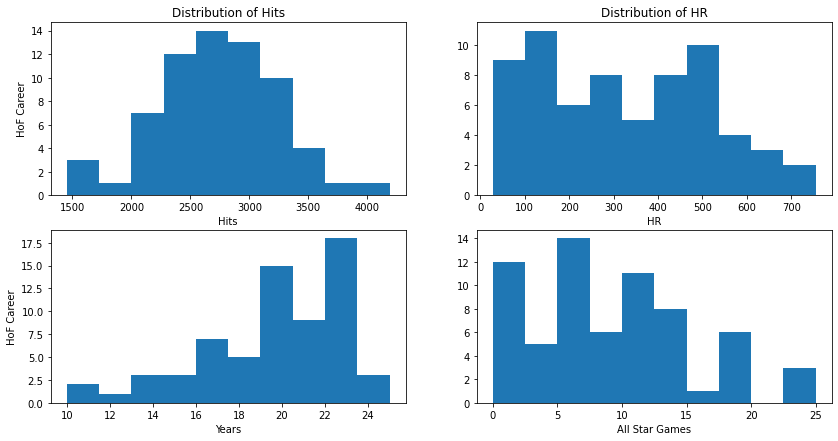

In [421]:
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(df_hof['H'])
ax1.set_title('Distribution of Hits')
ax1.set_ylabel('HoF Career')
ax1.set_xlabel('Hits')
ax2.hist(df_hof['HR'])
ax2.set_title('Distribution of HR')
ax2.set_xlabel('HR')
ax3.hist(df_hof['Years_Played'])
ax3.set_ylabel('HoF Career')
ax3.set_xlabel('Years')
ax4.hist(df_hof['AS_games'])
ax4.set_xlabel('All Star Games')
plt.show(fig)

In [422]:
df_10 = df[(df['Years_Played'] >= 10) & (df['HoF'] == 0)]
df_10.head()

,playerID,nameFirst,nameLast,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SH,SF,Years_Played,Af,Ef,DPf,HoF,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,bats_r,throws_r,debutYear,finalYear,AVE,PA,OBP,Single,SLG,OPS,first_app
33,abreubo01,Bobby,Abreu,1996-09-01,2014-09-28,2425,8480,1453,2470,574,59,288,1363.0,400.0,1476,1840.0,33.0,7.0,85.0,18,136.0,73.0,24.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,2425,0,0,0,0,0,0,142,21,1990,2138,161.0,0,0,0,0,0,0,1951,474,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.058557,0.00866,0.820619,0.881649,0.066392,0.0,0.0,0.0,0.000000,0.000000,0.0,0.804536,0.195464,0.0,1.0,1996.0,2014.0,0.291,10081.0,0.395,1549,0.475,0.870,0
57,adairje01,Jerry,Adair,1958-09-02,1970-05-03,1165,4019,378,1022,163,19,57,366.0,29.0,208,499.0,17.0,41.0,30.0,13,2878.0,103.0,618.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1165,0,0,1,811,45,310,0,0,0,0,0.0,0,0,0,298,867,0,0,0,0.0,0.0,0.000858,0.696137,0.038627,0.266094,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.255794,0.744206,0.0,0.000000,0.000000,1.0,1.0,1958.0,1970.0,0.254,4315.0,0.292,783,0.347,0.639,0
67,adamsbo03,Bobby,Adams,1946-04-16,1959-04-22,1281,4019,591,1082,188,49,37,303.0,67.0,414,447.0,17.0,78.0,0.0,14,2262.0,158.0,371.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1281,0,0,12,401,651,0,0,0,4,4,0.0,0,0,0,1281,0,0,0,0,0.0,0.0,0.009368,0.313037,0.508197,0.000000,0.000000,0.00000,0.003123,0.003123,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,1.0,1.0,1946.0,1959.0,0.269,4528.0,0.340,808,0.368,0.708,0
91,adamssp01,Sparky,Adams,1922-09-18,1934-09-30,1424,5557,844,1588,249,48,9,394.0,154.0,453,223.0,28.0,136.0,0.0,13,3748.0,230.0,597.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1424,0,0,0,552,534,301,2,0,2,4,0.0,0,1424,0,0,0,0,0,0,0.0,0.0,0.000000,0.387640,0.375000,0.211376,0.001404,0.00000,0.001404,0.002809,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,1.0,1922.0,1934.0,0.286,6174.0,0.343,1282,0.353,0.696,0
96,adcocjo01,Joe,Adcock,1950-04-23,1966-10-01,1959,6606,823,1832,295,35,336,1122.0,20.0,594,1059.0,17.0,52.0,0.0,17,900.0,102.0,1234.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1959,0,0,1496,0,0,0,313,0,1,313,0.0,0,0,0,1539,420,0,0,0,0.0,0.0,0.763655,0.000000,0.000000,0.000000,0.159775,0.00000,0.000510,0.159775,0.000000,0.0,0.0,0.0,0.785605,0.214395,0.0,0.000000,0.000000,1.0,1.0,1950.0,1966.0,0.277,7269.0,0.339,1166,0.485,0.824,0


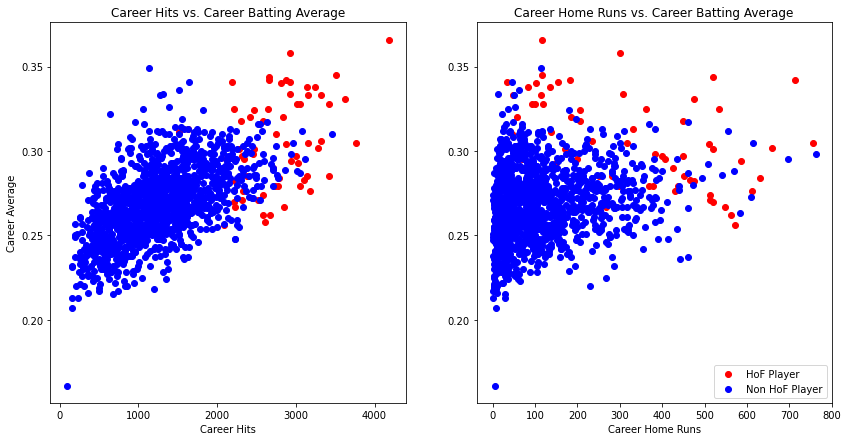

In [423]:
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df_hof['H'], df_hof['AVE'], c='r', label='HoF Player')
ax1.scatter(df_10['H'], df_10['AVE'], c='b', label='Non HoF Player')
ax1.set_title('Career Hits vs. Career Batting Average')
ax1.set_xlabel('Career Hits')
ax1.set_ylabel('Career Average')
ax2.scatter(df_hof['HR'], df_hof['AVE'], c='r', label='HoF Player')
ax2.scatter(df_10['HR'], df_10['AVE'], c='b', label='Non HoF Player')
ax2.set_title('Career Home Runs vs. Career Batting Average')
ax2.set_xlabel('Career Home Runs')
ax2.legend(loc='lower right', scatterpoints=1)
plt.show()

In [424]:
df.isnull().sum()

playerID      0
nameFirst     0
nameLast      0
debut         0
finalGame     0
             ..
OBP          59
Single        0
SLG          71
OPS          71
first_app     0
Length: 80, dtype: int64

In [0]:
df = df.dropna()

In [432]:
df.head()

,playerID,nameFirst,nameLast,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SH,SF,Years_Played,Af,Ef,DPf,HoF,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,bats_r,throws_r,debutYear,finalYear,AVE,PA,OBP,Single,SLG,OPS,first_app
1,aaronha01,Hank,Aaron,1954-04-13,1976-10-03,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,32.0,21.0,121.0,23,429.0,144.0,218.0,1.0,1.0,25.0,3.0,0.0,0.0,0.0,3298,0,0,210,43,7,0,315,308,2174,2760,201.0,0,0,0,1350,1948,0,0,0,0.0,0.0,0.063675,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,1.0,1.0,1954.0,1976.0,0.305,13940.0,0.374,2294,0.555,0.929,0
2,aaronto01,Tommie,Aaron,1962-04-10,1971-09-26,437,944,102,216,42,6,13,94.0,9.0,86,145.0,0.0,9.0,6.0,7,113.0,22.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,437,0,0,232,7,10,0,135,1,2,137,0.0,0,0,0,141,296,0,0,0,0.0,0.0,0.530892,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,0.0,0.0,0.0,0.322654,0.677346,0.0,0.0,0.0,1.0,1.0,1962.0,1971.0,0.229,1045.0,0.292,155,0.327,0.619,0
4,abadan01,Andy,Abad,2001-09-10,2006-04-13,15,21,1,2,0,0,0,0.0,0.0,4,5.0,0.0,0.0,0.0,3,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,0,0,8,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,15,0,0.0,0.0,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,2001.0,2006.0,0.095,25.0,0.240,2,0.095,0.335,0
6,abadijo01,John,Abadie,1875-04-26,1875-06-10,12,49,4,11,0,0,0,5.0,1.0,0,3.0,0.0,0.0,0.0,1,3.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0,0,12,0,0,0,0,0,0,0,0.0,12,0,0,0,0,0,0,0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1875.0,1875.0,0.224,49.0,0.224,11,0.224,0.448,0
7,abbated01,Ed,Abbaticchio,1897-09-04,1910-09-15,855,3044,355,772,99,43,11,324.0,142.0,289,0.0,33.0,93.0,0.0,9,2368.0,315.0,247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,855,0,0,0,419,20,388,0,2,1,3,0.0,855,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.490058,0.023392,0.453801,0.000000,0.002339,0.001170,0.003509,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1897.0,1910.0,0.254,3459.0,0.325,619,0.325,0.650,0


In [434]:
df['YSLS'] = 2017 - df['finalYear']
df_hitters = df[df['YSLS'] > 15]
df_hitters.head()

,playerID,nameFirst,nameLast,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SH,SF,Years_Played,Af,Ef,DPf,HoF,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,...,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,bats_r,throws_r,debutYear,finalYear,AVE,PA,OBP,Single,SLG,OPS,first_app,YSLS
1,aaronha01,Hank,Aaron,1954-04-13,1976-10-03,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,32.0,21.0,121.0,23,429.0,144.0,218.0,1.0,1.0,25.0,3.0,0.0,0.0,0.0,3298,0,0,210,43,7,0,315,308,2174,...,201.0,0,0,0,1350,1948,0,0,0,0.000000,0.0,0.063675,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,1.0,1.0,1954.0,1976.0,0.305,13940.0,0.374,2294,0.555,0.929,0,41.0
2,aaronto01,Tommie,Aaron,1962-04-10,1971-09-26,437,944,102,216,42,6,13,94.0,9.0,86,145.0,0.0,9.0,6.0,7,113.0,22.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,437,0,0,232,7,10,0,135,1,2,...,0.0,0,0,0,141,296,0,0,0,0.000000,0.0,0.530892,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,0.0,0.0,0.0,0.322654,0.677346,0.0,0.0,0.0,1.0,1.0,1962.0,1971.0,0.229,1045.0,0.292,155,0.327,0.619,0,46.0
6,abadijo01,John,Abadie,1875-04-26,1875-06-10,12,49,4,11,0,0,0,5.0,1.0,0,3.0,0.0,0.0,0.0,1,3.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0,0,12,0,0,0,0,0,0,...,0.0,12,0,0,0,0,0,0,0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1875.0,1875.0,0.224,49.0,0.224,11,0.224,0.448,0,142.0
7,abbated01,Ed,Abbaticchio,1897-09-04,1910-09-15,855,3044,355,772,99,43,11,324.0,142.0,289,0.0,33.0,93.0,0.0,9,2368.0,315.0,247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,855,0,0,0,419,20,388,0,2,1,...,0.0,855,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.490058,0.023392,0.453801,0.000000,0.002339,0.001170,0.003509,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1897.0,1910.0,0.254,3459.0,0.325,619,0.325,0.650,0,107.0
9,abbeych01,Charlie,Abbey,1893-08-16,1897-08-19,452,1756,307,493,67,46,19,280.0,93.0,167,122.0,23.0,0.0,0.0,5,92.0,100.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,452,1,0,0,0,0,0,92,185,173,...,0.0,452,0,0,0,0,0,0,0,0.002212,0.0,0.000000,0.000000,0.000000,0.000000,0.203540,0.409292,0.382743,0.997788,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1893.0,1897.0,0.281,1946.0,0.351,361,0.404,0.755,0,120.0


In [435]:
df_eligible = df[df['YSLS']<= 15]
df_eligible.head()

,playerID,nameFirst,nameLast,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SH,SF,Years_Played,Af,Ef,DPf,HoF,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,...,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,bats_r,throws_r,debutYear,finalYear,AVE,PA,OBP,Single,SLG,OPS,first_app,YSLS
4,abadan01,Andy,Abad,2001-09-10,2006-04-13,15,21,1,2,0,0,0,0.0,0.0,4,5.0,0.0,0.0,0.0,3,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,0,0,8,0,0,0,0,0,1,...,0.0,0,0,0,0,0,0,15,0,0.0,0.0,0.533333,0.000000,0.0,0.0,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,2001.0,2006.0,0.095,25.0,0.240,2,0.095,0.335,0,11.0
21,abercre01,Reggie,Abercrombie,2006-04-04,2008-09-28,180,386,65,86,20,2,9,34.0,18.0,21,123.0,7.0,5.0,2.0,3,7.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180,0,0,0,0,0,0,18,115,15,...,0.0,0,0,0,0,0,0,180,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.100000,0.638889,0.083333,0.744444,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,2006.0,2008.0,0.223,421.0,0.274,55,0.355,0.629,0,9.0
23,abernbr01,Brent,Abernathy,2001-06-25,2005-09-29,232,868,97,212,36,5,8,79.0,21.0,60,93.0,7.0,16.0,4.0,4,590.0,22.0,154.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232,0,0,0,223,0,0,5,0,0,...,3.0,0,0,0,0,0,0,232,0,0.0,0.0,0.000000,0.961207,0.0,0.0,0.021552,0.000000,0.000000,0.021552,0.012931,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,2001.0,2005.0,0.244,955.0,0.297,163,0.325,0.622,0,12.0
33,abreubo01,Bobby,Abreu,1996-09-01,2014-09-28,2425,8480,1453,2470,574,59,288,1363.0,400.0,1476,1840.0,33.0,7.0,85.0,18,136.0,73.0,24.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,2425,0,0,0,0,0,0,142,21,1990,...,161.0,0,0,0,0,0,0,1951,474,0.0,0.0,0.000000,0.000000,0.0,0.0,0.058557,0.008660,0.820619,0.881649,0.066392,0.0,0.0,0.0,0.0,0.0,0.0,0.804536,0.195464,0.0,1.0,1996.0,2014.0,0.291,10081.0,0.395,1549,0.475,0.870,0,3.0
35,abreujo02,Jose,Abreu,2014-03-31,2017-10-01,614,2414,330,726,144,12,124,410.0,6.0,172,515.0,56.0,0.0,18.0,4,291.0,35.0,466.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,614,0,0,515,0,0,0,0,0,0,...,99.0,0,0,0,0,0,0,0,614,0.0,0.0,0.838762,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.161238,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,2014.0,2017.0,0.301,2660.0,0.359,446,0.524,0.883,0,0.0


In [436]:
df.columns

Index(['playerID', 'nameFirst', 'nameLast', 'debut', 'finalGame', 'G', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 'HBP', 'SH', 'SF',
       'Years_Played', 'Af', 'Ef', 'DPf', 'HoF', 'Most Valuable Player',
       'AS_games', 'Gold Glove', 'Rookie of the Year', 'World Series MVP',
       'Silver Slugger', 'G_all', 'G_p', 'G_c', 'G_1b', 'G_2b', 'G_3b', 'G_ss',
       'G_lf', 'G_cf', 'G_rf', 'G_of', 'G_dh', 'pre1920', '1920-41', '1942-45',
       '1946-62', '1963-76', '1977-92', '1993-2009', 'post2009', 'G_p_percent',
       'G_c_percent', 'G_1b_percent', 'G_2b_percent', 'G_3b_percent',
       'G_ss_percent', 'G_lf_percent', 'G_cf_percent', 'G_rf_percent',
       'G_of_percent', 'G_dh_percent', 'pre1920_percent', '1920-41_percent',
       '1942-45_percent', '1946-62_percent', '1963-76_percent',
       '1977-92_percent', '1993-2009_percent', 'post2009_percent', 'bats_r',
       'throws_r', 'debutYear', 'finalYear', 'AVE', 'PA', 'OBP', 'Single',
       'SLG', 'OPS', '

In [0]:
num_cols_hitters = ['playerID', 'nameFirst', 'nameLast', 'HoF', 'Years_Played', 
                    'H', 'BB', 'HR', 'AVE', 'OBP', 'SLG', 'OPS',  'RBI',
                    'R', 'SB', '2B', '3B', 'AB', 'SO', 'Most Valuable Player', 
                    'World Series MVP', 'AS_games','Gold Glove', 'Rookie of the Year', 
                    'Silver Slugger', 'bats_r', 'throws_r', 'DPf', 'Af', 'Ef', 'YSLS', 
                    'G_all', '1963-76_percent', '1993-2009_percent', '1946-62_percent', 
                    'G_1b_percent', '1942-45_percent','G_dh_percent', '1920-41_percent', 
                    'G_ss_percent','post2009_percent', '1977-92_percent', 'G_2b_percent', 
                    'G_3b_percent','G_of_percent', 'pre1920_percent', 'first_app']

In [445]:
data = df_hitters[num_cols_hitters]
data.head()

,playerID,nameFirst,nameLast,HoF,Years_Played,H,BB,HR,AVE,OBP,SLG,OPS,RBI,R,SB,2B,3B,AB,SO,Most Valuable Player,World Series MVP,AS_games,Gold Glove,Rookie of the Year,Silver Slugger,bats_r,throws_r,DPf,Af,Ef,YSLS,G_all,1963-76_percent,1993-2009_percent,1946-62_percent,G_1b_percent,1942-45_percent,G_dh_percent,1920-41_percent,G_ss_percent,post2009_percent,1977-92_percent,G_2b_percent,G_3b_percent,G_of_percent,pre1920_percent,first_app
1,aaronha01,Hank,Aaron,1.0,23,3771,1402,755,0.305,0.374,0.555,0.929,2297.0,2174,240.0,624,98,12364,1383.0,1.0,0.0,25.0,3.0,0.0,0.0,1.0,1.0,218.0,429.0,144.0,41.0,3298,0.590661,0.0,0.409339,0.063675,0.0,0.060946,0.0,0.000000,0.0,0.0,0.013038,0.002122,0.836871,0.0,0
2,aaronto01,Tommie,Aaron,0.0,7,216,86,13,0.229,0.292,0.327,0.619,94.0,102,9.0,42,6,944,145.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,124.0,113.0,22.0,46.0,437,0.677346,0.0,0.322654,0.530892,0.0,0.000000,0.0,0.000000,0.0,0.0,0.016018,0.022883,0.313501,0.0,0
6,abadijo01,John,Abadie,0.0,1,11,0,0,0.224,0.224,0.224,0.448,5.0,4,1.0,0,0,49,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,13.0,142.0,12,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,0
7,abbated01,Ed,Abbaticchio,0.0,9,772,289,11,0.254,0.325,0.325,0.650,324.0,355,142.0,99,43,3044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,247.0,2368.0,315.0,107.0,855,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.453801,0.0,0.0,0.490058,0.023392,0.003509,1.0,0
9,abbeych01,Charlie,Abbey,0.0,5,493,167,19,0.281,0.351,0.404,0.755,280.0,307,93.0,67,46,1756,122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,92.0,100.0,120.0,452,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.997788,1.0,0


In [446]:
len(data)

5299

In [447]:
len(data[data['HoF']==1])

59

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn import model_selection

In [0]:
X = data.drop(['playerID', 'nameFirst', 'nameLast', 'HoF'],axis=1)
y = data['HoF']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=101)

In [713]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5299 entries, 1 to 19368
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Years_Played          5299 non-null   int64  
 1   H                     5299 non-null   int64  
 2   BB                    5299 non-null   int64  
 3   HR                    5299 non-null   int64  
 4   AVE                   5299 non-null   float64
 5   OBP                   5299 non-null   float64
 6   SLG                   5299 non-null   float64
 7   OPS                   5299 non-null   float64
 8   RBI                   5299 non-null   float64
 9   R                     5299 non-null   int64  
 10  SB                    5299 non-null   float64
 11  2B                    5299 non-null   int64  
 12  3B                    5299 non-null   int64  
 13  AB                    5299 non-null   int64  
 14  SO                    5299 non-null   float64
 15  Most Valuable Player

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 

In [0]:
# Logistic Regression
log = LogisticRegression(max_iter=1000)

# K Nearest Neighbors
KNN = KNeighborsClassifier()

# SVM
svm = SVC()

# Random Forest
RF = RandomForestClassifier()

In [715]:
model_names = ['Logistic Regression','KNN','Random Forest','SVM']
model_list = [log, KNN, RF, svm]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=10)
    print(cv_score)
    print('Model accuracy of %s is: %.3f'%(model_names[count],cv_score.mean()))
    count += 1

[0.99191375 0.99191375 0.99191375 0.99730458 0.99460916 0.99730458
 1.         0.99730458 0.98921833 1.        ]
Model accuracy of Logistic Regression is: 0.995
[0.99191375 0.99191375 0.99191375 0.99191375 0.99191375 0.99191375
 0.99730458 0.98921833 0.99191375 0.9972973 ]
Model accuracy of KNN is: 0.993
[0.99730458 0.99460916 0.99191375 0.99191375 0.99460916 0.99730458
 1.         1.         1.         0.9972973 ]
Model accuracy of Random Forest is: 0.996
[0.98921833 0.98921833 0.98921833 0.98921833 0.99191375 0.98921833
 0.98921833 0.98921833 0.99191375 0.98918919]
Model accuracy of SVM is: 0.990


In [0]:
from sklearn.model_selection import GridSearchCV 

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [561]:
# Possible hyperparamter options for Logistic Regression Regularization 
parameters = {
    #'penalty':('l2', 'none'), 
    'C':(0.01, 0.1, 1)
}
Grid_LR = GridSearchCV(LogisticRegression(max_iter=1000),parameters, cv=10)
Grid_LR.fit(X_train, y_train)
print_grid_search_metrics(Grid_LR)
best_LR_model = Grid_LR.best_estimator_

Best score: 0.996
Best parameters set:
	C: 0.1


In [563]:
# Possible hyperparamter options for KNN --choose the best k
parameters = {
    'n_neighbors':[1,10,100] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=10)
Grid_KNN.fit(X_train, y_train)
print_grid_search_metrics(Grid_KNN)
best_KNN_model = Grid_KNN.best_estimator_

Best score: 0.994
Best parameters set:
	n_neighbors: 1


In [564]:
# Possible hyperparamter options for Random Forest--choose the best number of trees
parameters = {
    'n_estimators' : [5,10,50,80,100]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=10)
Grid_RF.fit(X_train, y_train)
print_grid_search_metrics(Grid_RF)
best_RF_model = Grid_RF.best_estimator_

Best score: 0.996
Best parameters set:
	n_estimators: 50


In [565]:
parameters = {'gamma': [0.01, 0.1, 1],
                     'C': [0.01, 0.1, 1]}                   
Grid_SVM = GridSearchCV(SVC,parameters, cv=10)
Grid_SVM.fit(X_train, y_train)
print_grid_search_metrics(Grid_SVM)
best_SVM_model = Grid_SVM.best_estimator_

Best score: 0.994
Best parameters set:
	C: 1
	gamma: 0.01


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: %0.3f" % accuracy)
    print ("precision is: %0.3f" % precision)
    print ("recall is: %0.3f" % recall)

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','HoF']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.997
precision is: 0.933
recall is: 0.778


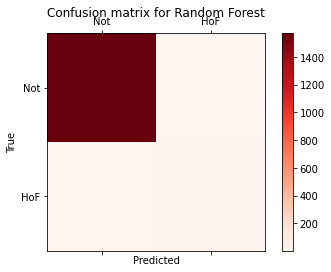

Logistic Regression
Accuracy is: 0.996
precision is: 0.923
recall is: 0.667


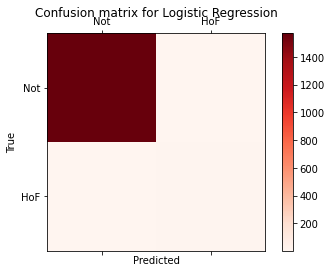

KNN
Accuracy is: 0.993
precision is: 0.818
recall is: 0.500


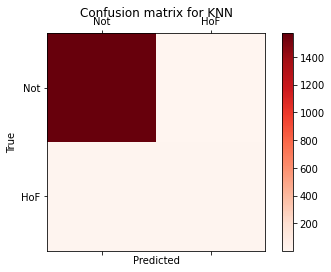

SVM
Accuracy is: 0.996
precision is: 1.000
recall is: 0.667


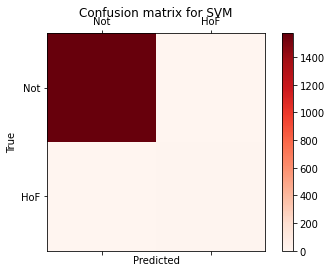

In [567]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("KNN", confusion_matrix(y_test,best_KNN_model.predict(X_test))),
    ("SVM", confusion_matrix(y_test,best_SVM_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

In [0]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

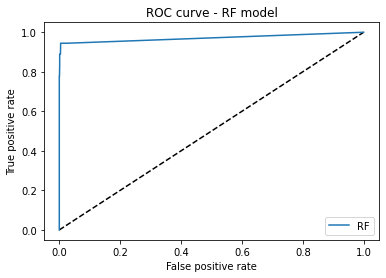

In [569]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

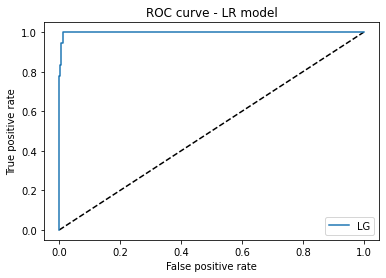

In [570]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lg = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lg, tpr_lg, _ = roc_curve(y_test, y_pred_lg)

# ROC curve of Logistic Regression result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lg, tpr_lg, label='LG')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR model')
plt.legend(loc='best')
plt.show()

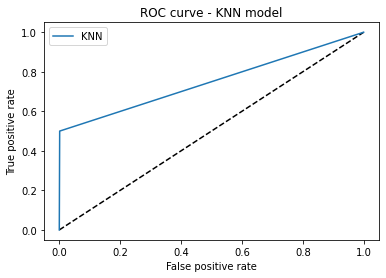

In [571]:
# Use predict_proba to get the probability results of KNN
y_pred_knn = best_KNN_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)

# ROC curve of KNN result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN model')
plt.legend(loc='best')
plt.show()

In [0]:
log = LogisticRegression(max_iter=1000, C=0.1,verbose=1)

In [573]:
log.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [0]:
predictions = log.predict(X_test)

In [575]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1572
         1.0       0.92      0.67      0.77        18

    accuracy                           1.00      1590
   macro avg       0.96      0.83      0.89      1590
weighted avg       1.00      1.00      1.00      1590

[[1571    1]
 [   6   12]]


In [578]:
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rfc_pred = rfc.predict(X_test)

In [580]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[1571    1]
 [   5   13]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1572
         1.0       0.93      0.72      0.81        18

    accuracy                           1.00      1590
   macro avg       0.96      0.86      0.91      1590
weighted avg       1.00      1.00      1.00      1590



In [675]:
importances = rfc.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
H: 0.1542
RBI: 0.0935
R: 0.0832
AB: 0.079
2B: 0.0721
G_all: 0.0584
AS_games: 0.0495
HR: 0.0484
OPS: 0.0439
BB: 0.0407
Years_Played: 0.0361
Most Valuable Player: 0.0319
SLG: 0.0245
AVE: 0.019
3B: 0.0189
Af: 0.0179
SO: 0.0144
DPf: 0.0126
YSLS: 0.0089
SB: 0.0084
Silver Slugger: 0.0078
1920-41_percent: 0.007
1946-62_percent: 0.0069
first_app: 0.0068
G_dh_percent: 0.0063
G_of_percent: 0.0062
OBP: 0.0061
Ef: 0.0051
1977-92_percent: 0.005
G_1b_percent: 0.0049
G_3b_percent: 0.0044
bats_r: 0.0033
G_2b_percent: 0.0032
G_ss_percent: 0.0028
1942-45_percent: 0.0026
pre1920_percent: 0.0023
Gold Glove: 0.0016
1993-2009_percent: 0.0011
1963-76_percent: 0.0008
Rookie of the Year: 0.0004
throws_r: 0.0
post2009_percent: 0.0
World Series MVP: 0.0


In [0]:
# Create `target` Series
target = data['HoF']

# Create `features` DataFrame
features = data.drop(['playerID', 'nameFirst', 'nameLast', 'HoF'], axis=1)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_sc = scaler.fit_transform(features) 

In [725]:
# Import cross_val_predict, KFold and LogisticRegression from 'sklearn'
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression model
lr = LogisticRegression(class_weight='balanced', max_iter=1000)

# Create an instance of the KFold class
kf = KFold(features.shape[0], random_state=1)

# Create predictions using cross validation
predictions_lr = cross_val_predict(lr, features_sc, target, cv=kf)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
# Convert predictions and target to NumPy arrays
np_predictions_lr = np.asarray(predictions_lr)
np_target = target.to_numpy()

In [729]:
# Determine True Positive count
tp_filter_lr = (np_predictions_lr == 1) & (np_target == 1)
tp_lr = len(np_predictions_lr[tp_filter_lr])

# Determine False Negative count
fn_filter_lr = (np_predictions_lr == 0) & (np_target == 1)
fn_lr = len(np_predictions_lr[fn_filter_lr])

# Determine False Positive count
fp_filter_lr = (np_predictions_lr == 1) & (np_target == 0)
fp_lr = len(np_predictions_lr[fp_filter_lr])

# Determine True Negative count
tn_filter_lr = (np_predictions_lr == 0) & (np_target == 0)
tn_lr = len(np_predictions_lr[tn_filter_lr])

# Determine True Positive rate
tpr_lr = tp_lr / (tp_lr + fn_lr)

# Determine False Negative rate
fnr_lr = fn_lr / (fn_lr + tp_lr)

# Determine False Positive rate
fpr_lr = fp_lr / (fp_lr + tn_lr)

# Print each count
print(tp_lr)
print(fn_lr)
print(fp_lr)

# Print each rate
print(tpr_lr)
print(fnr_lr)
print(fpr_lr)

49
10
31
0.8305084745762712
0.1694915254237288
0.005916030534351145


In [0]:
# Create penalty dictionary
penalty = {
    0: 100,
    1: 1
}

# Create Random Forest model
rf = RandomForestClassifier(random_state=1,n_estimators=12, max_depth=11, min_samples_leaf=1, class_weight=penalty)

# Create predictions using cross validation
predictions_rf = cross_val_predict(rf, features_sc, target, cv=kf)

# Convert predictions to NumPy array
np_predictions_rf = np.asarray(predictions_rf)

In [731]:
# Determine True Positive count
tp_filter_rf = (np_predictions_rf == 1) & (np_target == 1)
tp_rf = len(np_predictions_rf[tp_filter_rf])

# Determine False Negative count
fn_filter_rf = (np_predictions_rf == 0) & (np_target == 1)
fn_rf = len(np_predictions_rf[fn_filter_rf])

# Determine False Positive count
fp_filter_rf = (np_predictions_rf == 1) & (np_target == 0)
fp_rf = len(np_predictions_rf[fp_filter_rf])

# Determine True Negative count
tn_filter_rf = (np_predictions_rf == 0) & (np_target == 0)
tn_rf = len(np_predictions_rf[tn_filter_rf])

# Determine True Positive rate
tpr_rf = tp_rf / (tp_rf + fn_rf)

# Determine False Negative rate
fnr_rf = fn_rf / (fn_rf + tp_rf)

# Determine False Positive rate
fpr_rf = fp_rf / (fp_rf + tn_rf)

# Print each count
print(tp_rf)
print(fn_rf)
print(fp_rf)

# Print each rate
print(tpr_rf)
print(fnr_rf)
print(fpr_rf)

48
11
8
0.8135593220338984
0.1864406779661017
0.0015267175572519084


In [0]:
# Create a new DataFrame from `df_eligible` using `num_col_hitters`
new_data = df_eligible[num_cols_hitters]

# Create a new features DataFrame
new_features = new_data.drop(['playerID', 'nameFirst', 'nameLast', 'HoF'], axis=1)

In [0]:
# Fit the Random Forest model
rf.fit(features_sc, target)

# Estimate probabilities of Hall of Fame induction
probabilities = rf.predict_proba(new_features)

In [0]:
# Convert predictions to a DataFrame
hof_predictions = pd.DataFrame(probabilities[:,1])

# Sort the DataFrame (descending)
hof_predictions = hof_predictions.sort_values(0, ascending=False)

hof_predictions['Probability'] = hof_predictions[0]

In [0]:
pred = new_data.join(hof_predictions,how='inner')

In [774]:
pred[pred['playerID']== 'jeterde01']['Probability']

733    1.0
Name: Probability, dtype: float64

In [776]:
pred[pred['playerID']== 'walkela01']['Probability']

1464    1.0
Name: Probability, dtype: float64

In [773]:
pred[pred['playerID']== 'troutmi01']['Probability']

1412    1.0
Name: Probability, dtype: float64